In [200]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [201]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [202]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [203]:
start = '2015-01-01'
end = '2015-06-29'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,5,17)
en = dt.datetime(2015,6,29)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)


bdir = '/results2/SalishSea/hindcast.201812_annex/'
sdir = '/data/tjarniko/results/BASEPARTY/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

1
180


In [204]:
def make_nclen(start,end,ftype, bdir, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)
    
    #print('days: '+str(len(arrow_array)))
    dayslen = len(arrow_array)
    hovmoller_base = np.zeros([1533,40,dayslen])
    hovmoller_sens = np.zeros([1533,40,dayslen])

    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        #nc_base = bdir  + ddmmmyy + '/SalishSea_1d_*_' + ftype +'_T.nc'
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_T_' + ymd + '-' + ymd + '.nc'
        #tnc_base = glob.glob(nc_base) 
        tnc_sens = glob.glob(nc_sens)
        #print(tnc_sens)
        
        #base_ar.append(tnc_base[0])
        sens_ar.append(tnc_sens[0])
        
    return base_ar, sens_ar

In [205]:


base_ar, sens_ar = make_nclen(start,end,'carp', bdir, sdir)

base_arG,sens_arG = make_nclen(start,end,'grid', bdir, sdir)

base_arP,sens_arP = make_nclen(start,end,'ptrc', bdir, sdir)

In [206]:
def combine_files(files, var, jss, iss):

    time = np.array([])
    var_list = []
    i = 0
    for f in files:
        if i%30 == 0:
            print(i)
        G = nc.Dataset(f)
#         if i == 1:
#             print(G)
        var_tmp = G.variables[var][:]
        if var == 'co2_flux_mmol_m2_s':
            var_tmp=var_tmp[:,jss,iss]
        
        else:
            var_tmp=var_tmp[:,:,jss,iss]
        
        var_list.append(var_tmp)
#         t = nc_tools.timestamp(G, np.arange(var_tmp.shape[0]))
#         try:
#             for ind in range(len(t)):
#                 t[ind] = t[ind].datetime
#         except TypeError:
#             t = t.datetime
#         time = np.append(time, t)
        i = i+1

    var_ary = np.concatenate(var_list, axis=0)
    return var_ary, time

In [207]:

# dic_base = combine_files(base_ar,'dissolved_inorganic_carbon',thalweg_pts[:, 0],thalweg_pts[:, 1])
# #extract masked array from tuple
# dic_base2 = dic_base[0]
# print(np.shape(dic_base2))

dic_sens = combine_files(sens_ar,'dissolved_inorganic_carbon',thalweg_pts[:, 0],thalweg_pts[:, 1])
#extract masked array from tuple
dic_sens2 = dic_sens[0]
print(np.shape(dic_sens2))

flux_sens = combine_files(sens_ar,'co2_flux_mmol_m2_s',thalweg_pts[:, 0],thalweg_pts[:, 1])
flux_sens2 = flux_sens[0]
print(np.shape(flux_sens2))

temp_sens = combine_files(sens_arG,'votemper',thalweg_pts[:, 0],thalweg_pts[:, 1])
#extract masked array from tuple
temp_sens2 = temp_sens[0]
print(np.shape(temp_sens2))

sal_sens = combine_files(sens_arG,'vosaline',thalweg_pts[:, 0],thalweg_pts[:, 1])
#extract masked array from tuple
sal_sens2 = sal_sens[0]
print(np.shape(sal_sens2))

ta_sens = combine_files(sens_ar,'total_alkalinity',thalweg_pts[:, 0],thalweg_pts[:, 1])
#extract masked array from tuple
ta_sens2 = ta_sens[0]

0
30
60
90
120
150
(180, 40, 1533)
0
30
60
90
120
150
(180, 1533)
0
30
60
90
120
150
(180, 40, 1533)
0
30
60
90
120
150
(180, 40, 1533)
0
30
60
90
120
150


In [208]:
nit_sens = combine_files(sens_arP,'nitrate',thalweg_pts[:, 0],thalweg_pts[:, 1])
#extract masked array from tuple
nit_sens2 = nit_sens[0]


0
30
60
90
120
150


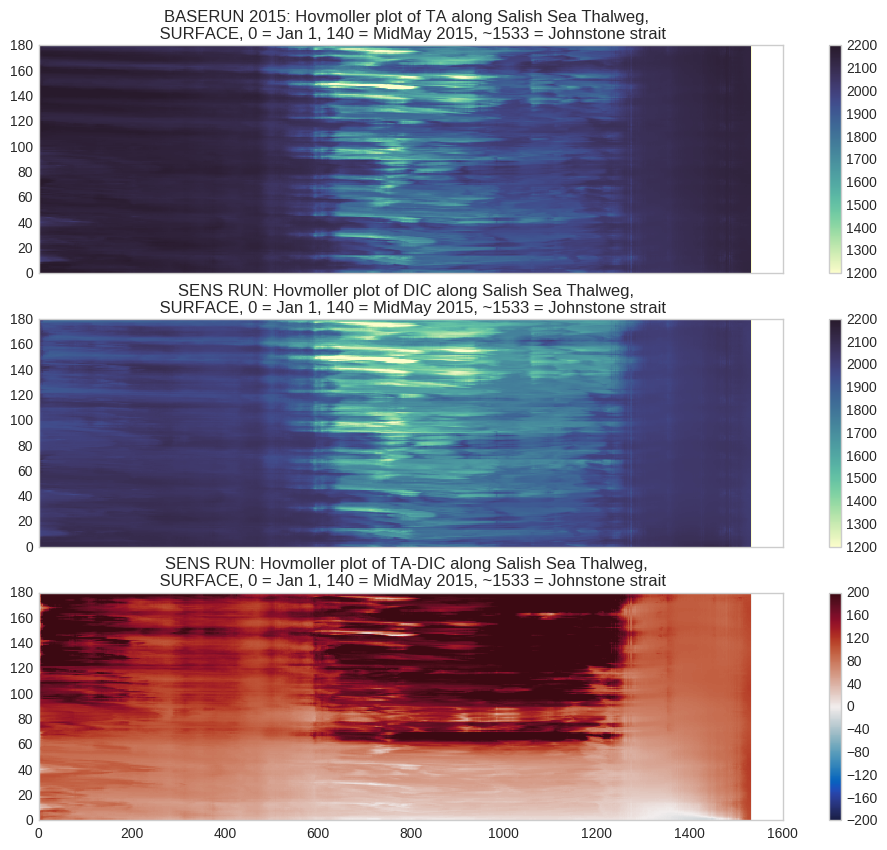

In [209]:
%matplotlib inline

###figures
fig = plt.figure(figsize=(12,10))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(3,1,i)
        tplt = ta_sens2[:,0,:]
        t_cmap = cm.cm.deep
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=1200, vmax=2200)
        ax.set_title('BASERUN 2015: Hovmoller plot of TA along Salish Sea Thalweg,  \n SURFACE, 0 = Jan 1, 140 = MidMay 2015, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(3,1,i)
        tplt = dic_sens2[:,0,:]
        t_cmap = cm.cm.deep
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=1200, vmax=2200)
        ax.set_title('SENS RUN: Hovmoller plot of DIC along Salish Sea Thalweg,  \n SURFACE, 0 = Jan 1, 140 = MidMay 2015, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(3,1,i)
        tplt = ta_sens2[:,0,:]-dic_sens2[:,0,:]
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-200, vmax=200)
        ax.set_title('SENS RUN: Hovmoller plot of TA-DIC along Salish Sea Thalweg,  \n SURFACE, 0 = Jan 1, 140 = MidMay 2015, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)

t_figstring = './FIGS/' + figstring + 'HM_dicta.jpg'
fig.savefig(t_figstring)


In [210]:
tdir = '/data/tjarniko/results/SAMPL/'
w = glob.glob(tdir + 'SalishSea_1ts_*carp*')
w2 = glob.glob(tdir + 'SalishSea_1ts_*grid_T*')
print(w[0])
carp = nc.Dataset(w[0])
grid = nc.Dataset(w2[0])

tsal = grid.variables['vosaline'][0,0,:,:]
ttemp = grid.variables['votemper'][0,0,:,:]
tdic = carp.variables['dissolved_inorganic_carbon'][0,0,:,:]
tta = carp.variables['total_alkalinity'][0,0,:,:]



/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_carp_T_20141121-20141121.nc


In [211]:
size_box = np.shape(tdic)
size_0 = size_box[0]
size_1= size_box[1]
print(size_1)

398


In [212]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):
    
#     tsal = grid.variables['vosaline'][0,0,:,:]
#     ttemp = grid.variables['votemper'][0,0,:,:]
#     tdic = carp.variables['dissolved_inorganic_carbon'][0,0,:,:]
#     tta = carp.variables['total_alkalinity'][0,0,:,:]

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth[:] = depth_this
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [213]:
np.shape(sal_sens2)
dep = 0
tsal_s = sal_sens2[:,dep,:]
ttemp_s = temp_sens2[:,dep,:]
tdic_s = dic_sens2[:,dep,:]
tta_s = ta_sens2[:,dep,:]


In [214]:
pHr_s, OmAr_s, pco2r_s = oned_moxy(tsal_s, ttemp_s, tdic_s, tta_s, 1, 0)

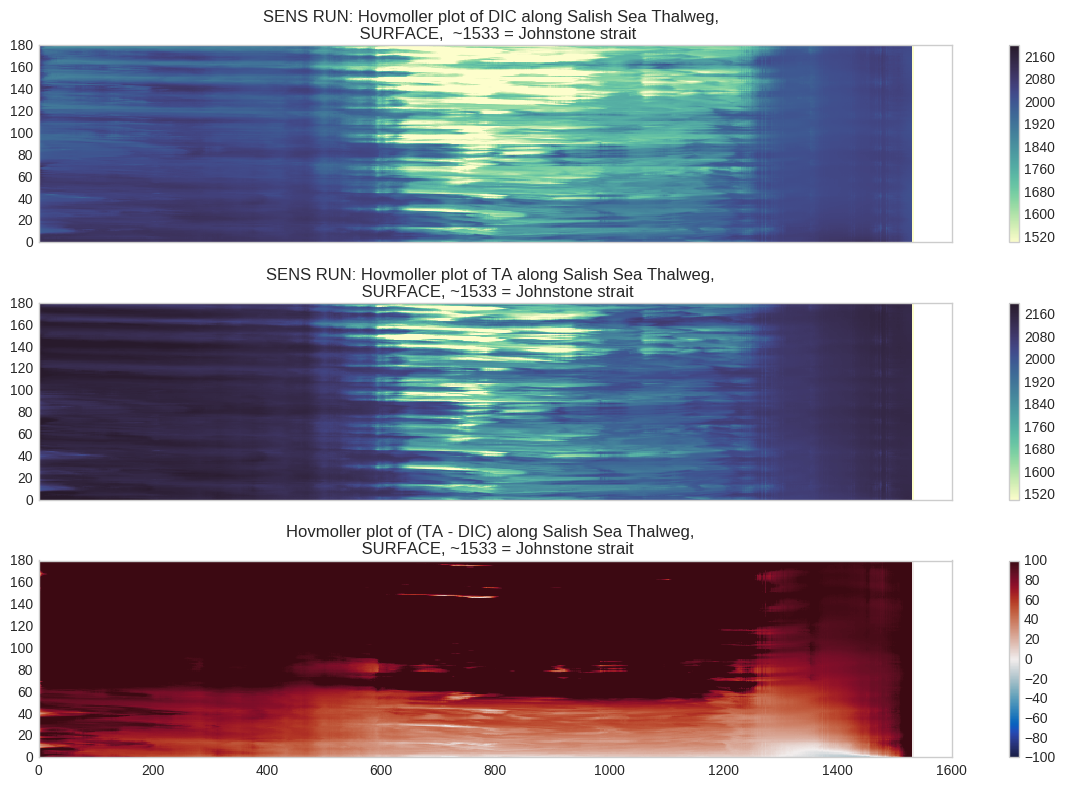

In [215]:
%matplotlib inline
vmin_p = 0
vmax_p = 2
###figures
fig = plt.figure(figsize=(12,8))
nop = 3

for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        tplt = dic_sens2[:,0,:]
        t_cmap = cm.cm.deep
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=1500, vmax=2200)
        ax.set_title('SENS RUN: Hovmoller plot of DIC along Salish Sea Thalweg,  \n SURFACE,  ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        tplt = ta_sens2[:,0,:]
        t_cmap = cm.cm.deep
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=1500, vmax=2200)
        ax.set_title('SENS RUN: Hovmoller plot of TA along Salish Sea Thalweg,  \n SURFACE, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        ax.xaxis.set_ticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(nop,1,i)
        tplt = ta_sens2[:,0,:] - dic_sens2[:,0,:]
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-100, vmax=100)
        ax.set_title('Hovmoller plot of (TA - DIC) along Salish Sea Thalweg,  \n SURFACE, ~1533 = Johnstone strait')
                     
        cbar = fig.colorbar(mesh, ax=ax)
        
fig.tight_layout()
t_figstring = './FIGS/' + figstring + 'HM_dicta2.jpg'
fig.savefig(t_figstring)

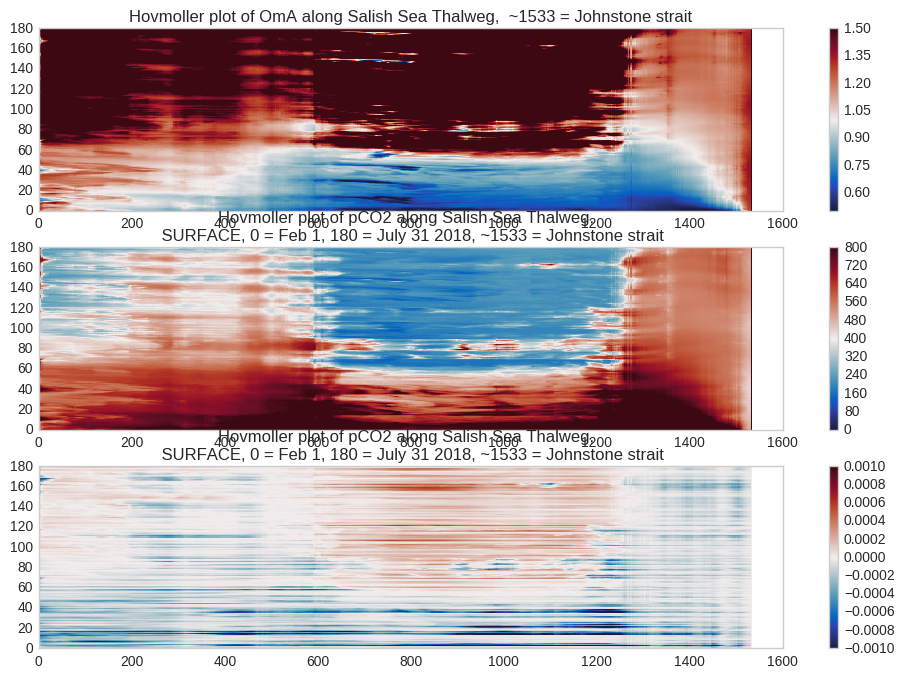

In [216]:
%matplotlib inline
vmin_p = 0
vmax_p = 2
###figures
fig = plt.figure(figsize=(12,8))
nop = 3

for i in range(1,nop+1):        
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        tplt = OmAr_s
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=0.5, vmax=1.5)
        ax.set_title('Hovmoller plot of OmA along Salish Sea Thalweg,  ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        tplt = pco2r_s
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=0, vmax=800)
        ax.set_title('Hovmoller plot of pCO2 along Salish Sea Thalweg,  \n SURFACE, 0 = Feb 1, 180 = July 31 2018, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        
    if i == 3:
        ax = fig.add_subplot(nop,1,i)
        tplt = flux_sens2[:,:]
        t_cmap = cm.cm.balance
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=-0.001, vmax=0.001)
        ax.set_title('Hovmoller plot of pCO2 along Salish Sea Thalweg,  \n SURFACE, 0 = Feb 1, 180 = July 31 2018, ~1533 = Johnstone strait')
        cbar = fig.colorbar(mesh, ax=ax)
        
t_figstring = './FIGS/' + figstring + 'HM_pco2OmA.jpg'
fig.savefig(t_figstring)
    

In [217]:
t_dic = dic_sens2[140:143,0:1,1000:103] * 1e-3
print(np.shape(t_dic))
t_ta = ta_sens2[140:143,0:1,1000:103] * 1e-3
print(t_ta)
t_sal = sal_sens2[140:143,0:1,1000:103]
print(t_sal)
t_temp = temp_sens2[140:143,0:1,1000:103]
print(t_temp)

pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1, 0)


(3, 1, 0)
[]
[]
[]


In [218]:
infil = loadtxt('../DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('../DATASETS/grl2016_nu.txt')

crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
lat = infil_cor[:,6]
lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

yr = np.zeros_like(mon)

dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35
S_psu= S_rs*35/35.16504

yr[:] = 2014
# day_of_year = datetime.now().timetuple().tm_yday
dts = []
yds = []
for i in range(0,len(mon)):
    tyr = yr[i]
    tmon = mon[i]
    tday = day[i]
    tdt = dt.datetime(int(tyr),int(tmon),int(tday))
    dts.append(tdt)
    yd = tdt.timetuple().tm_yday
    yds.append(yd)
    
yds_ar = np.array(yds)

surf_dic = dic_conv[P<=5]
surf_yds = yds_ar[P<=5]

dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000
alk_conv=alk*dens/1000

S_rs = S * 35.16504/35
S_psu= S_rs*35/35.16504

DIC = nc.Dataset('../MODEL_EVAL//extracted_ncs/DIC_fy_2018.nc')

DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4


dic_jdf=dic_conv[(P<=5)&(loc_tag==1)] #black
dic_haro=dic_conv[(P<=5)&(loc_tag==4)] #fucksia
dic_ns =dic_conv[(P<=5)&(loc_tag==2)] #orange
dic_cs=dic_conv[(P<=5)&(loc_tag==3)]

yds_jdf=yds_ar[(P<=5)&(loc_tag==1)] #black
yds_haro=yds_ar[(P<=5)&(loc_tag==4)] #fucksia
yds_ns =yds_ar[(P<=5)&(loc_tag==2)] #orange
yds_cs=yds_ar[(P<=5)&(loc_tag==3)]

alk_jdf=alk_conv[(P<=5)&(loc_tag==1)] #black
alk_haro=alk_conv[(P<=5)&(loc_tag==4)] #fucksia
alk_ns =alk_conv[(P<=5)&(loc_tag==2)] #orange
alk_cs=alk_conv[(P<=5)&(loc_tag==3)]

sal_jdf=S[(P<=5)&(loc_tag==1)] #black
sal_haro=S[(P<=5)&(loc_tag==4)] #fucksia
sal_ns =S[(P<=5)&(loc_tag==2)] #orange
sal_cs=S[(P<=5)&(loc_tag==3)]

nit_jdf=no3[(P<=5)&(loc_tag==1)] #black
nit_haro=no3[(P<=5)&(loc_tag==4)] #fucksia
nit_ns =no3[(P<=5)&(loc_tag==2)] #orange
nit_cs=no3[(P<=5)&(loc_tag==3)]


In [219]:
yds_sens = np.arange(y_st,y_en+1,1)
print('yds sens')
print(np.shape(yds_sens))
print('shape dic_Sens')
dic_sens_surf = dic_sens2[:,0,:]
print(np.shape(dic_sens_surf))
np.shape(yds_sens)


yds sens
(180,)
shape dic_Sens
(180, 1533)


(180,)

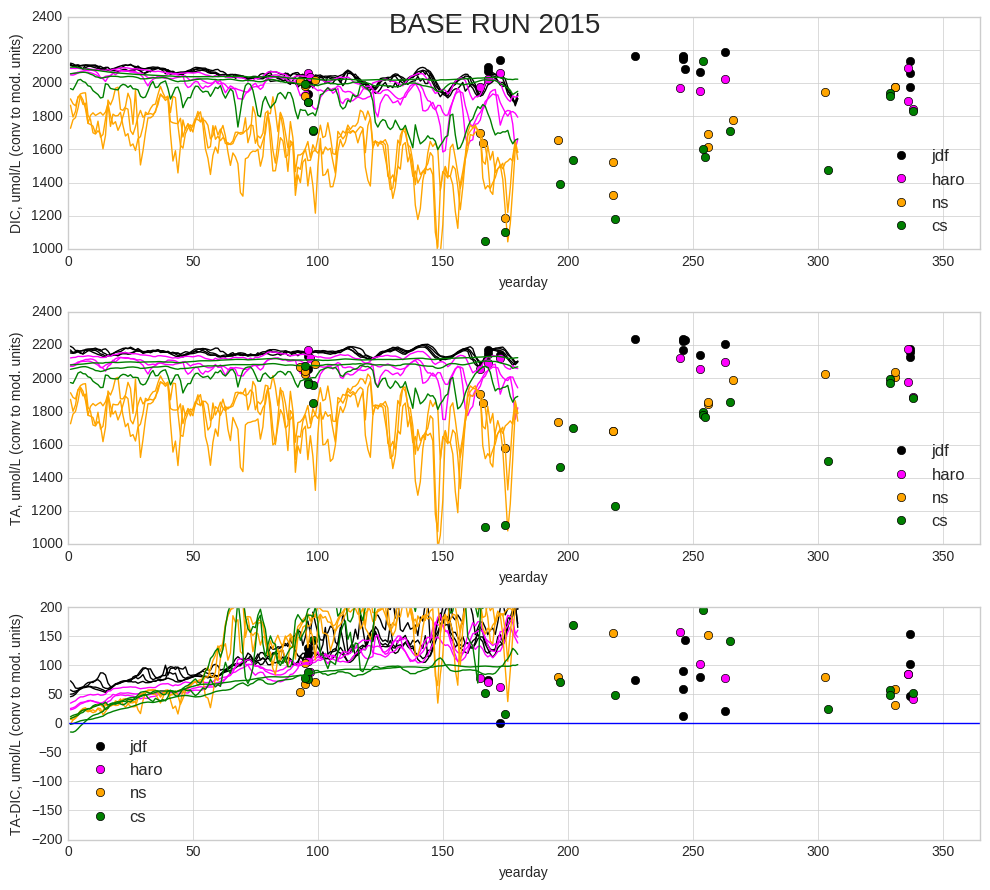

In [220]:
fig = plt.figure(figsize=(10,9))
nop = 3
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,dic_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_sens,dic_sens2[:,0,150],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,200],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,250],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,300],c='black')
        
        ax.plot(yds_haro,dic_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,dic_sens2[:,0,450],c='fuchsia')
        ax.plot(yds_sens,dic_sens2[:,0,500],c='fuchsia')
        ax.plot(yds_sens,dic_sens2[:,0,550],c='fuchsia')        
        
        ax.plot(yds_ns,dic_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,dic_sens2[:,0,750],c='orange')
        ax.plot(yds_sens,dic_sens2[:,0,800],c='orange')
        ax.plot(yds_sens,dic_sens2[:,0,850],c='orange')   
        
        ax.plot(yds_cs,dic_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,dic_sens2[:,0,1200],c='green')
        ax.plot(yds_sens,dic_sens2[:,0,1300],c='green')
        ax.plot(yds_sens,dic_sens2[:,0,1400],c='green')  
        
        ax.set_xlim([0,365])
        ax.set_ylim([1000,2400])
        ax.set_ylabel('DIC, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,alk_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_sens,ta_sens2[:,0,150],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,200],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,250],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,300],c='black')
        
        ax.plot(yds_haro,alk_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,ta_sens2[:,0,450],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,500],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,550],c='fuchsia')        
        
        ax.plot(yds_ns,alk_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,ta_sens2[:,0,750],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,800],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,850],c='orange')   
        
        ax.plot(yds_cs,alk_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,ta_sens2[:,0,1200],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1300],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1400],c='green')  
        ax.set_xlim([0,365])
        ax.set_ylim([1000,2400])
        ax.set_ylabel('TA, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
    if i == 3:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,alk_jdf-dic_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_haro,alk_haro-dic_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_ns,alk_ns-dic_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_cs,alk_cs-dic_cs,c='green', marker='o',linestyle='None',label = 'cs')
        
        ax.plot(yds_sens,ta_sens2[:,0,150]-dic_sens2[:,0,150],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,200]-dic_sens2[:,0,200],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,250]-dic_sens2[:,0,250],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,300]-dic_sens2[:,0,300],c='black')

        ax.plot(yds_sens,ta_sens2[:,0,450]-dic_sens2[:,0,450],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,500]-dic_sens2[:,0,500],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,550]-dic_sens2[:,0,550],c='fuchsia')        

        ax.plot(yds_sens,ta_sens2[:,0,750]-dic_sens2[:,0,750],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,800]-dic_sens2[:,0,800],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,850]-dic_sens2[:,0,850],c='orange')   
    
    
        ax.plot(yds_sens,ta_sens2[:,0,1100]-dic_sens2[:,0,1100],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1200]-dic_sens2[:,0,1200],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1300]-dic_sens2[:,0,1300],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1400]-dic_sens2[:,0,1400],c='green')
        
        
        
        ax.set_xlim([0,365])
        ax.set_ylim([-200,200])
        ax.plot([0,365],[0,0])
        ax.set_ylabel('TA-DIC, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')

fig.suptitle('BASE RUN 2015', fontsize = 20)
fig.tight_layout()

t_figstring = './FIGS/' + figstring + 'LP_dicta.jpg'
fig.savefig(t_figstring)


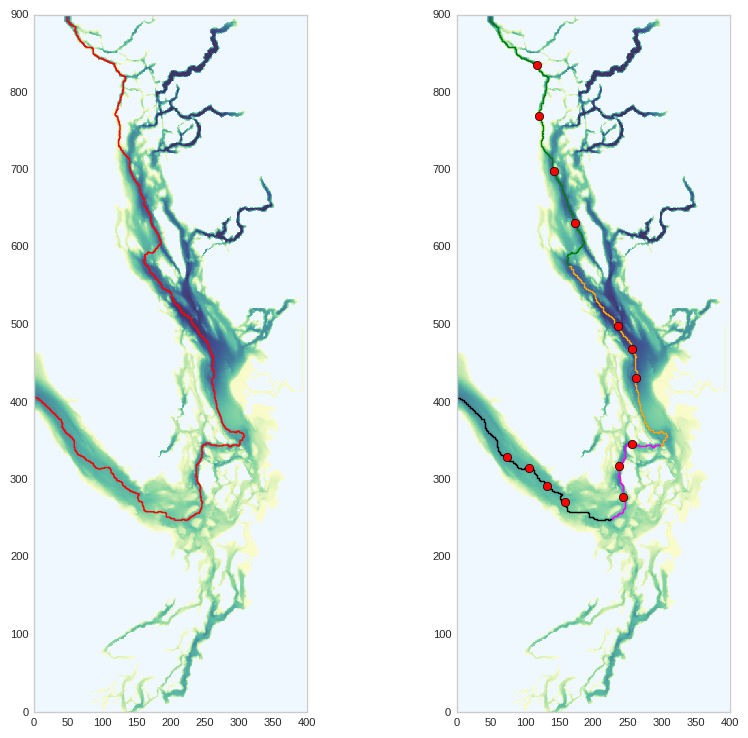

In [221]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
t_cmap = cm.cm.deep
# def one_panel_plot(surfdat_1, 'tit1',t_cmap,xsize,ysize,0,500,'bath','woo'):
#     "TESTED"

fig = plt.figure(figsize=(10,9))
nop = 2
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(1,nop,i)
        cmap = t_cmap
        tplt = np.ma.masked_values(bath1,0)
        ax.set_title('',fontsize = 20 )
        v_min = 0
        v_max = 500
        clabel = 'cl1'

        viz_tools.set_aspect(ax)
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
        ax.plot(thalweg_pts[:, 1],thalweg_pts[:, 0],'r-')
        #cbar = fig.colorbar(mesh, ax=ax)
        #cbar.set_label(clabel, fontsize = 20 )
        cbar.ax.tick_params(labelsize=10)


        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        cmap.set_bad('aliceblue')

    if i == 2:
        ax = fig.add_subplot(1,nop,i)
        cmap = t_cmap
        tplt = np.ma.masked_values(bath1,0)
        ax.set_title('',fontsize = 20 )
        v_min = 0
        v_max = 500
        clabel = 'cl1'

        viz_tools.set_aspect(ax)
        mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
        #       
        ax.plot(thalweg_pts[0:400, 1],thalweg_pts[0:400, 0],'k-')
        ax.plot(thalweg_pts[400:600, 1],thalweg_pts[400:600, 0],color='fuchsia',linestyle='-')
        ax.plot(thalweg_pts[600:1000, 1],thalweg_pts[600:1000, 0],color='orange',linestyle='-')
        ax.plot(thalweg_pts[1000:1533, 1],thalweg_pts[1000:1533, 0],color='green',linestyle='-')

        tpoints = [150,200,250,300,450,500,550,750,800,850,1100,1200,1300,1400]
        for i in range(0,len(tpoints)):
            ttp = tpoints[i]
            ax.plot(thalweg_pts[ttp,1],thalweg_pts[ttp,0],marker = 'o',color = 'red')
        #[150,200,250,300,450,500,550,750,800,850,1200,1300,1400]
        #cbar = fig.colorbar(mesh, ax=ax)
        #cbar.set_label(clabel, fontsize = 20 )
        cbar.ax.tick_params(labelsize=10)


        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        cmap.set_bad('aliceblue')
        #plt.suptitle('bathymetry',fontsize=20)
        
t_figstring = './FIGS/' + figstring + 'TW_map.jpg'
fig.savefig(t_figstring)
#

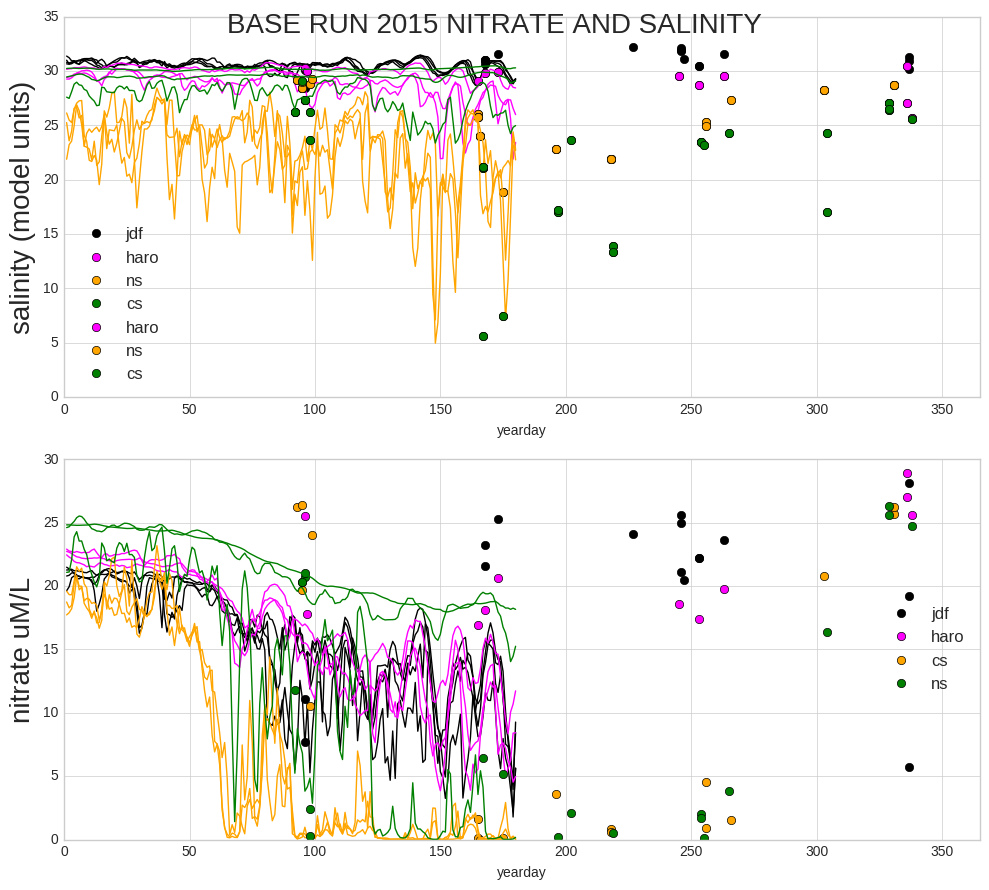

In [222]:
fig = plt.figure(figsize=(10,9))
nop = 2
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,sal_jdf,c='black', marker='o',linestyle='None',label = 'jdf')

        ax.plot(yds_haro,sal_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
     
        
        ax.plot(yds_ns,sal_ns,c='orange', marker='o',linestyle='None',label = 'ns')
  
        
        ax.plot(yds_cs,sal_cs,c='green', marker='o',linestyle='None',label = 'cs')

        ax.plot(yds_sens,sal_sens2[:,0,150],c='black', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,200],c='black', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,250],c='black', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,300],c='black', linestyle = '-')
        
        ax.plot(yds_haro,sal_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,sal_sens2[:,0,450],c='fuchsia', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,500],c='fuchsia', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,550],c='fuchsia', linestyle = '-')        
        
        ax.plot(yds_ns,sal_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,sal_sens2[:,0,750],c='orange', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,800],c='orange', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,850],c='orange', linestyle = '-')   
        
        ax.plot(yds_cs,sal_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,sal_sens2[:,0,1200],c='green', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,1300],c='green', linestyle = '-')
        ax.plot(yds_sens,sal_sens2[:,0,1400],c='green', linestyle = '-')  

        ax.set_xlim([0,365])
        #ax.set_ylim([1000,2400])
        ax.set_ylabel('salinity (model units)', fontsize = 20)
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,nit_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_sens,nit_sens2[:,0,150],c='black', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,200],c='black', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,250],c='black', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,300],c='black', linestyle = '-')
        
        ax.plot(yds_haro,nit_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,nit_sens2[:,0,450],c='fuchsia', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,500],c='fuchsia', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,550],c='fuchsia', linestyle = '-')        
        
        ax.plot(yds_ns,nit_ns,c='orange', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,nit_sens2[:,0,750],c='orange', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,800],c='orange', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,850],c='orange', linestyle = '-')   
        
        ax.plot(yds_cs,nit_cs,c='green', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,nit_sens2[:,0,1200],c='green', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,1300],c='green', linestyle = '-')
        ax.plot(yds_sens,nit_sens2[:,0,1400],c='green', linestyle = '-')  

        ax.set_xlim([0,365])
        #ax.set_ylim([1000,2400])
        ax.set_ylabel('nitrate uM/L', fontsize = 20)
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        

fig.suptitle('BASE RUN 2015 NITRATE AND SALINITY', fontsize = 20)
fig.tight_layout()

t_figstring = './FIGS/' + figstring + 'LP_nitsal.jpg'
fig.savefig(t_figstring)


In [223]:
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
date_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

for i in range(0,len(arrow_array)):
    r = arrow_array[i][0]
    yyyymmdd = r.format('YYYYMMDD')
    tstr = 'y'+str(yyyymmdd[0:4]) + 'm' + str(yyyymmdd[4:6]) + 'd' + str(yyyymmdd[6:8])
    date_array.append(tstr)
    
Fraser_disc = np.zeros(365)
fras_i = 500
fras_j = 394

for i in range(0,365):
    tdir = '/results/forcing/rivers/'
    tstr = 'R201702DFraCElse_' + date_array[i] +'.nc'

    w = nc.Dataset(tdir + tstr)
    t_disc = w['rorunoff'][0,fras_i,fras_j]
    Fraser_disc[i] = t_disc
    


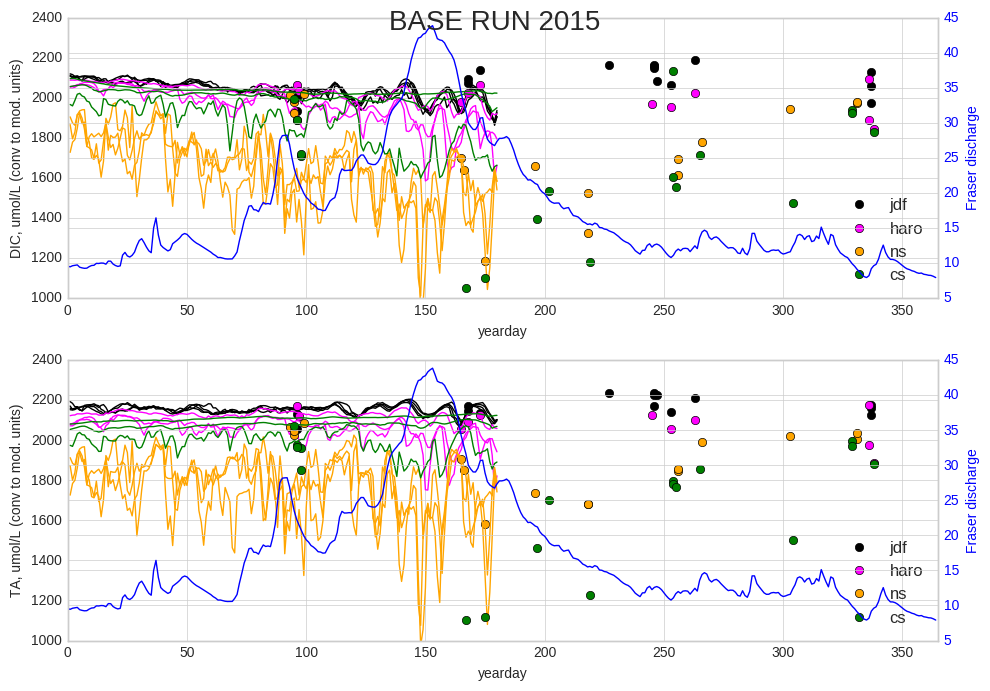

In [229]:
fig = plt.figure(figsize=(10,7))
nop = 2
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,dic_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_sens,dic_sens2[:,0,150],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,200],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,250],c='black')
        ax.plot(yds_sens,dic_sens2[:,0,300],c='black')
        
        ax.plot(yds_haro,dic_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,dic_sens2[:,0,450],c='fuchsia')
        ax.plot(yds_sens,dic_sens2[:,0,500],c='fuchsia')
        ax.plot(yds_sens,dic_sens2[:,0,550],c='fuchsia')        
        
        ax.plot(yds_ns,dic_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,dic_sens2[:,0,750],c='orange')
        ax.plot(yds_sens,dic_sens2[:,0,800],c='orange')
        ax.plot(yds_sens,dic_sens2[:,0,850],c='orange')   
        
        ax.plot(yds_cs,dic_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,dic_sens2[:,0,1200],c='green')
        ax.plot(yds_sens,dic_sens2[:,0,1300],c='green')
        ax.plot(yds_sens,dic_sens2[:,0,1400],c='green')  
        

        ax.set_ylim([1000,2400])
        ax.set_ylabel('DIC, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'blue'
        ax2.set_ylabel('Fraser discharge', color=color)  # we already handled the x-label with ax1
        ax2.plot(Fraser_disc, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax.set_xlim([0,365])
        ax2.set_xlim([0,365])
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)
        ax.plot(yds_jdf,alk_jdf,c='black', marker='o',linestyle='None',label = 'jdf')
        ax.plot(yds_sens,ta_sens2[:,0,150],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,200],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,250],c='black')
        ax.plot(yds_sens,ta_sens2[:,0,300],c='black')
        
        ax.plot(yds_haro,alk_haro,c='fuchsia', marker='o',linestyle='None',label = 'haro')
        ax.plot(yds_sens,ta_sens2[:,0,450],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,500],c='fuchsia')
        ax.plot(yds_sens,ta_sens2[:,0,550],c='fuchsia')        
        
        ax.plot(yds_ns,alk_ns,c='orange', marker='o',linestyle='None',label = 'ns')
        ax.plot(yds_sens,ta_sens2[:,0,750],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,800],c='orange')
        ax.plot(yds_sens,ta_sens2[:,0,850],c='orange')   
        
        ax.plot(yds_cs,alk_cs,c='green', marker='o',linestyle='None',label = 'cs')
        ax.plot(yds_sens,ta_sens2[:,0,1200],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1300],c='green')
        ax.plot(yds_sens,ta_sens2[:,0,1400],c='green')  
        ax.set_xlim([0,365])
        ax.set_ylim([1000,2400])
        ax.set_ylabel('TA, umol/L (conv to mod. units)')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'blue'
        ax2.set_ylabel('Fraser discharge', color=color)  # we already handled the x-label with ax1
        ax2.plot(Fraser_disc, color=color)
        ax2.tick_params(axis='y', labelcolor=color)        
        
        
        ax.set_xlim([0,365])
        ax2.set_xlim([0,365])
        ax.plot([0,365],[0,0])
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        ax.set_xlim([0,365])
        ax2.set_xlim([0,365])
        
fig.suptitle('BASE RUN 2015', fontsize = 20)
fig.tight_layout()
t_figstring = './FIGS/' + figstring + 'LP_dicta_runoff.jpg'
fig.savefig(t_figstring)


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


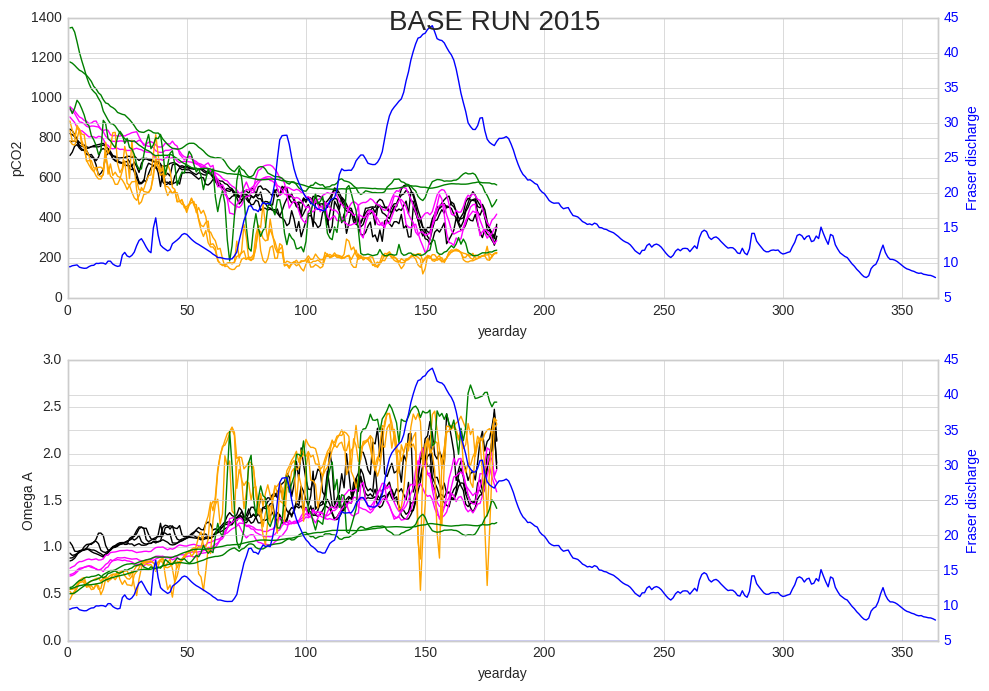

In [230]:
fig = plt.figure(figsize=(10,7))
nop = 2
for i in range(1,nop+1):
    if i == 1:
        ax = fig.add_subplot(nop,1,i)

        ax.plot(yds_sens,pco2r_s[:,150],c='black')
        ax.plot(yds_sens,pco2r_s[:,200],c='black')
        ax.plot(yds_sens,pco2r_s[:,250],c='black')
        ax.plot(yds_sens,pco2r_s[:,300],c='black')
        

        ax.plot(yds_sens,pco2r_s[:,450],c='fuchsia')
        ax.plot(yds_sens,pco2r_s[:,500],c='fuchsia')
        ax.plot(yds_sens,pco2r_s[:,550],c='fuchsia')        
        
        ax.plot(yds_sens,pco2r_s[:,750],c='orange')
        ax.plot(yds_sens,pco2r_s[:,800],c='orange')
        ax.plot(yds_sens,pco2r_s[:,850],c='orange')   
        

        ax.plot(yds_sens,pco2r_s[:,1200],c='green')
        ax.plot(yds_sens,pco2r_s[:,1300],c='green')
        ax.plot(yds_sens,pco2r_s[:,1400],c='green')  
        
        ax.set_xlim([0,365])
        ax.set_ylabel('pCO2')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'blue'
        ax2.set_ylabel('Fraser discharge', color=color)  # we already handled the x-label with ax1
        ax2.plot(Fraser_disc, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax.set_xlim([0,365])
        ax2.set_xlim([0,365])
        
    if i == 2:
        ax = fig.add_subplot(nop,1,i)

        ax.plot(yds_sens,OmAr_s[:,150],c='black')
        ax.plot(yds_sens,OmAr_s[:,200],c='black')
        ax.plot(yds_sens,OmAr_s[:,250],c='black')
        ax.plot(yds_sens,OmAr_s[:,300],c='black')
        

        ax.plot(yds_sens,OmAr_s[:,450],c='fuchsia')
        ax.plot(yds_sens,OmAr_s[:,500],c='fuchsia')
        ax.plot(yds_sens,OmAr_s[:,550],c='fuchsia')        

        ax.plot(yds_sens,OmAr_s[:,750],c='orange')
        ax.plot(yds_sens,OmAr_s[:,800],c='orange')
        ax.plot(yds_sens,OmAr_s[:,850],c='orange')   

        ax.plot(yds_sens,OmAr_s[:,1200],c='green')
        ax.plot(yds_sens,OmAr_s[:,1300],c='green')
        ax.plot(yds_sens,OmAr_s[:,1400],c='green')  
        ax.set_xlim([0,365])
        ax.set_ylabel('OmA')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        
        ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'blue'
        ax2.set_ylabel('Fraser discharge', color=color)  # we already handled the x-label with ax1
        ax2.plot(Fraser_disc, color=color)
        ax2.tick_params(axis='y', labelcolor=color)        
        
        
        ax.set_xlim([0,365])
        ax.plot([0,365],[0,0])
        ax.set_ylabel('Omega A')
        ax.set_xlabel('yearday')
        ax.legend(loc='best')
        ax.set_xlim([0,365])
        ax2.set_xlim([0,365])
fig.suptitle('BASE RUN 2015', fontsize = 20)
fig.tight_layout()
t_figstring = './FIGS/' + figstring + 'LP_omapco2_runoff.jpg'
fig.savefig(t_figstring)


In [226]:
np.shape(pco2r_s)


(180, 1533)